# Week 2 - End-to-end ML project
1. Get the data
2. Data exploration
3. Prepare datasets
4. Choose the models
5. Analyze the model


## 1. Get the Data

Our task is to predict median house values in Californian districts, given a number of features from these districts.

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## 2. Data exploration

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualize the data

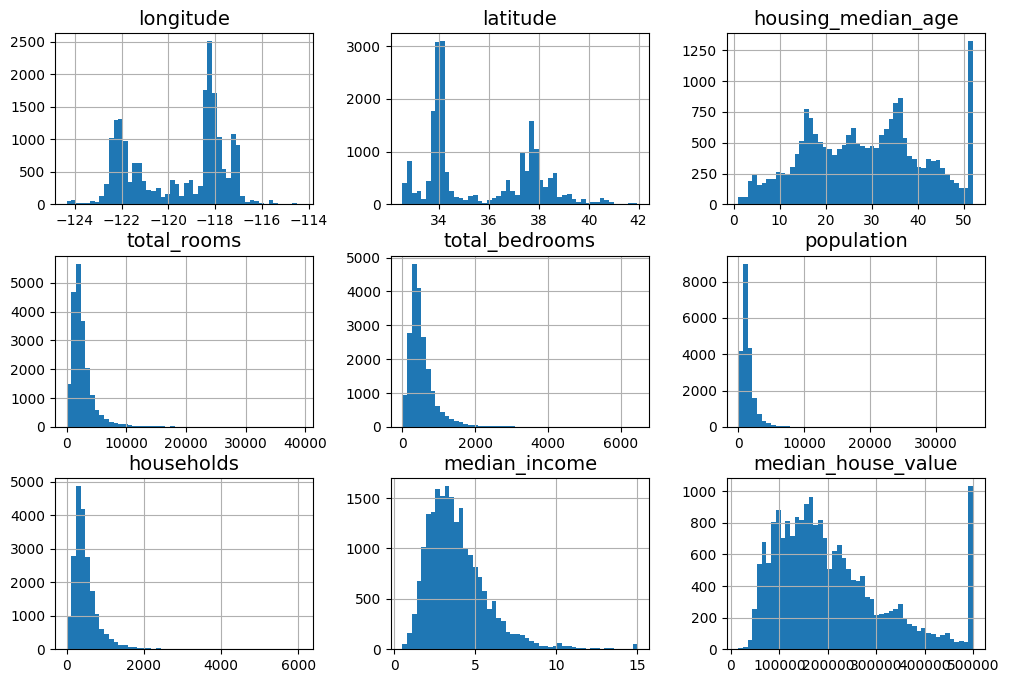

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

### Create a Test Set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
len(train_set)

16512

### Discover and Visualize the Data to Gain Insights

In [8]:
housing = train_set.copy()

### Visualizing Geographical Data

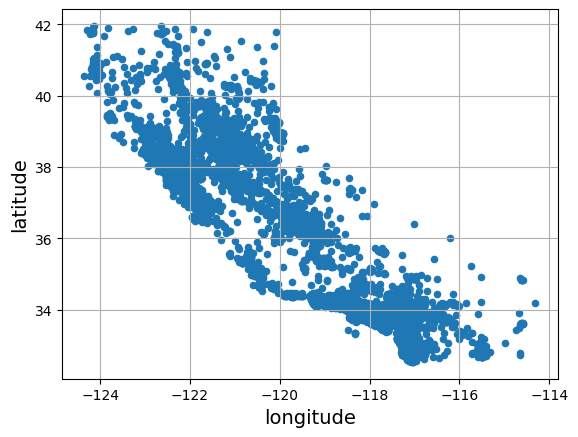

In [9]:
train_set.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

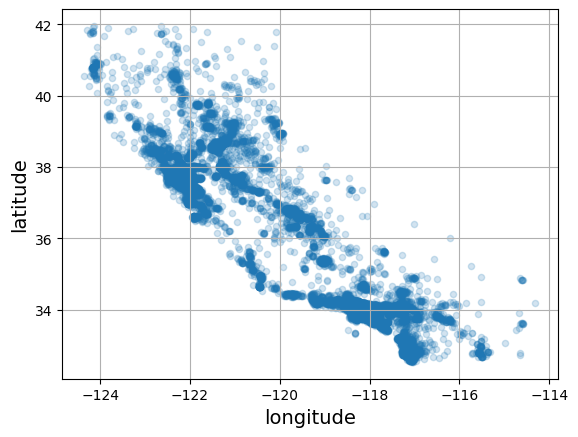

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

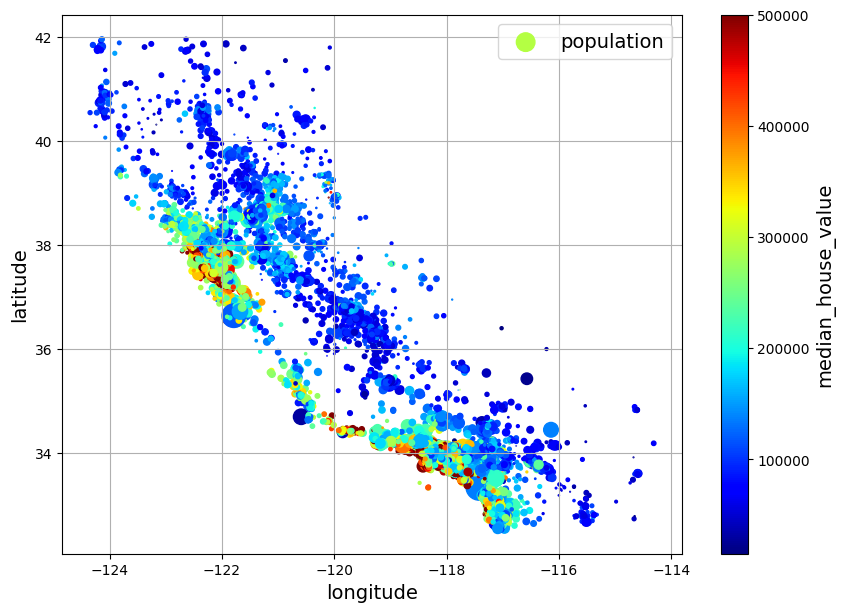

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

## 3. Prepare datasets

In [15]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

### Data Cleaning

Missing value - three ways to address
- Drop the the districts with nan values
- Drop the columns with nan values
- Replace the nan values with certain values (zero, mean, median etc.)

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```


In [16]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,NaN,798.0,270.0,3.7750,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,INLAND
9827,-121.85,36.61,38.0,238.0,NaN,191.0,67.0,1.3897,<1H OCEAN


In [17]:
housing.isnull().any()

,0
longitude,False
latitude,False
housing_median_age,False
total_rooms,False
total_bedrooms,True
population,False
households,False
median_income,False
ocean_proximity,False


In [18]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,437.0,798.0,270.0,3.7750,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,437.0,3038.0,727.0,5.1762,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,437.0,1404.0,603.0,5.5073,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,437.0,478.0,112.0,2.3382,INLAND
9827,-121.85,36.61,38.0,238.0,437.0,191.0,67.0,1.3897,<1H OCEAN


### Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:
- Ordinal encoder
- One-hot encoder

In [19]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR BAY
14265,<1H OCEAN
2271,INLAND
17848,NEAR BAY
6252,INLAND
9389,<1H OCEAN


In [20]:
housing_cat['ocean_proximity'].unique()

array(['NEAR OCEAN', 'NEAR BAY', '<1H OCEAN', 'INLAND', 'ISLAND'],
      dtype=object)

In [21]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encoder(catagorical_data):
  ordinal_encoder = OrdinalEncoder()
  return ordinal_encoder.fit_transform(catagorical_data)

In [22]:
housing_cat_encoded = ordinal_encoder(housing_cat)
housing_cat_encoded[:8]

array([[4.],
       [4.],
       [3.],
       [0.],
       [1.],
       [3.],
       [1.],
       [0.]])

In [23]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encoder(categorical_data):
  cat_encoder = OneHotEncoder(sparse=False)
  return cat_encoder.fit_transform(categorical_data)
housing_cat_1hot = onehot_encoder(housing_cat)
housing_cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [24]:
housing['ocean_proximity_encoded'] = housing_cat_encoded
housing_prep = housing.drop(columns=['ocean_proximity'])

## 4. Choose the models

### Training and Evaluating on the Training Set

In [25]:
housing_prep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,4.0
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,4.0
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,3.0
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,0.0
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,1.0
...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,3.0
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,0.0
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,1.0
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,1.0


In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prep, housing_labels)

LinearRegression()

In [27]:
housing_predictions = lin_reg.predict(housing_prep)
housing_predictions[:5]

array([283227.75636557, 218680.10636445, 292471.48102678, 260659.9066406 ,
        26741.77305388])

In [28]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

69472.99865188751

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prep, housing_labels)

DecisionTreeRegressor()

In [30]:
housing_predictions = tree_reg.predict(housing_prep)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

## 5. Analyze the model

In [31]:
# final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

median = X_test["total_bedrooms"].median()  # option 3
X_test["total_bedrooms"].fillna(median, inplace=True)
X_test['ocean_proximity_encoded'] = ordinal_encoder(X_test[['ocean_proximity']])
X_test = X_test.drop(columns=['ocean_proximity'])

final_predictions_lin = lin_reg.predict(X_test)
final_predictions_tree = tree_reg.predict(X_test)

final_rmse_lin = mean_squared_error(y_test, final_predictions_lin, squared=False)
final_rmse_tree = mean_squared_error(y_test, final_predictions_tree, squared=False)

print('Final rmse for linear regressor: ', final_rmse_lin)
print('Final rmse for tree regressor: ', final_rmse_tree)

Final rmse for linear regressor:  70485.7725047882
Final rmse for tree regressor:  69880.73782965174
